In [41]:
from EOF_manage import *
from I_O_manage import *
from basic_op_jup import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cdo import Cdo

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [42]:
# Creating the dataset with daily data
dataset_0, dataset_names = input_interface('I_O.json')
dataset = dataset_0.rolling(time=30, center=True).mean().dropna("time")

In [ ]:
# Computing eofs and pcs for daily dataset
#eof_database, pc_database, exp_databas, solver_list = eof_base_interface(dataset, dataset_names, 'EOF.json') 

# Plotting eofs and pcs
#eof_database.ERA5_tp.plot(col="mode", col_wrap = 3, vmin = -0.2, vmax = 0.2, cmap = 'jet')
#pc_database.ERA5_tp.plot(col="mode", col_wrap = 3)

<xarray.DataArray 'ERA5_tp' (mode: 3)>
array([0.8851497 , 0.08101714, 0.01893896], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

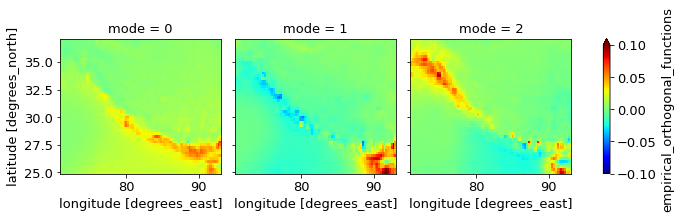

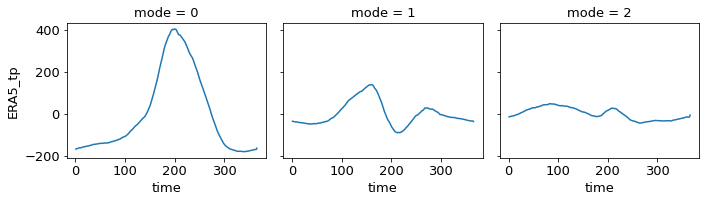

In [73]:
# Creating day of year dataset
dataset_doy = dataset.groupby('time.dayofyear').mean().rename(dayofyear = 'time')

# Computing eofs and pcs for doy dataset
eof_database_doy, pc_database_doy, exp_databas_doy, solver_list_doy = eof_base_interface(dataset_doy, dataset_names, 'EOF.json') 

# Plotting eofs and pcs
eof_database_doy.ERA5_tp.plot(col="mode", col_wrap = 3, vmin = -0.1, vmax = 0.1, cmap = 'jet')
pc_database_doy.ERA5_tp.plot(col="mode", col_wrap = 3)

exp_databas_doy.ERA5_tp

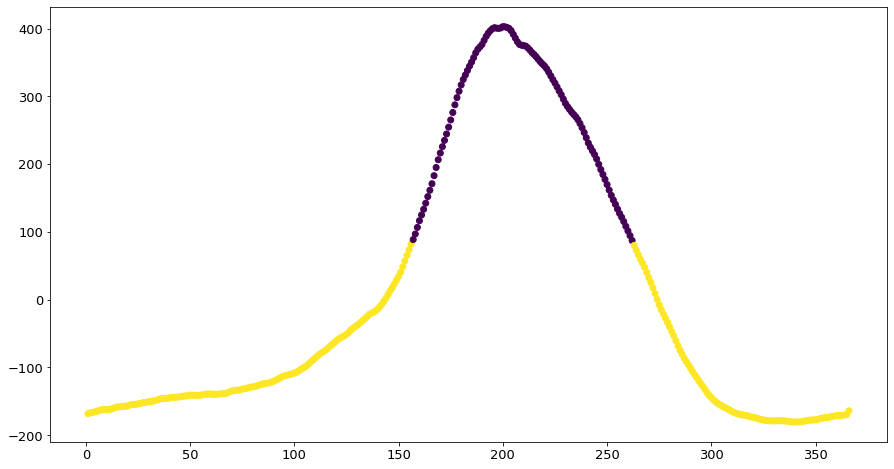

In [74]:
data = pc_database_doy.ERA5_tp.to_numpy()

model, clust_centers = kmean_training(data, 2, 300)
prediction = kmean_preditting(model, data)


plt.figure(figsize = (15,8))

plt.scatter(pc_database_doy.ERA5_tp.time,pc_database_doy.ERA5_tp.sel(mode=0), c = prediction)

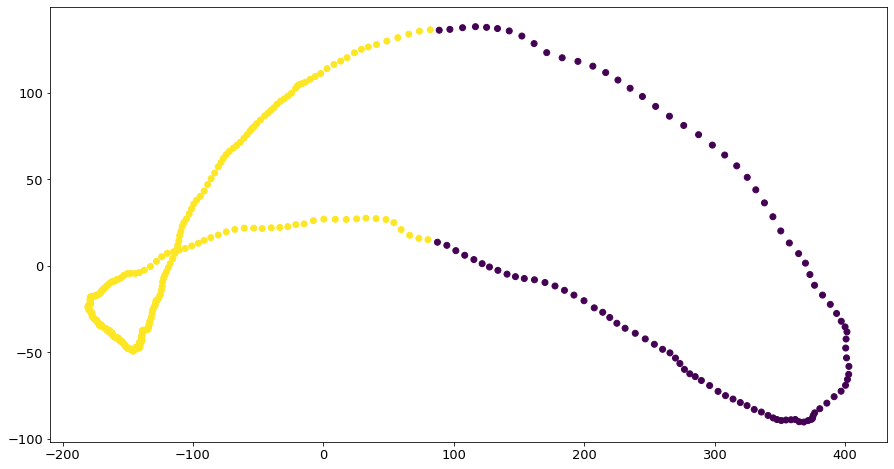

In [75]:
plt.figure(figsize = (15,8))
plt.scatter(pc_database_doy.ERA5_tp.sel(mode=0),pc_database_doy.ERA5_tp.sel(mode=1), c = prediction)

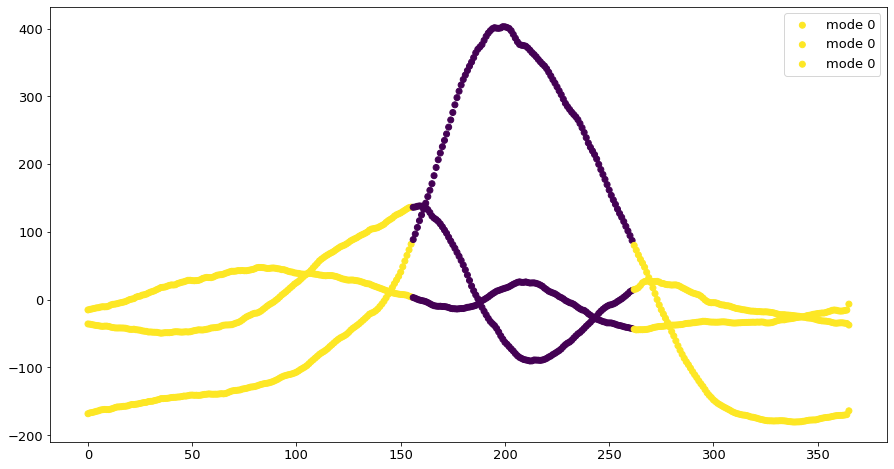

In [76]:
plt.figure(figsize = (15,8))
plt.scatter(np.arange(0,366,1),pc_database_doy.ERA5_tp.sel(mode=0), c = prediction, label = 'mode 0')
plt.scatter(np.arange(0,366,1),pc_database_doy.ERA5_tp.sel(mode=1), c = prediction, label = 'mode 0')
plt.scatter(np.arange(0,366,1),pc_database_doy.ERA5_tp.sel(mode=2), c = prediction, label = 'mode 0')
plt.legend()

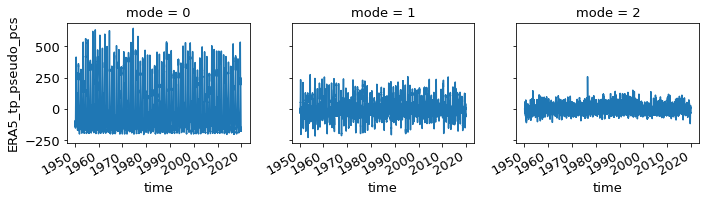

In [77]:
pc_proj = eof_proj_interface(solver_list_doy, dataset, dataset_names, 'EOF.json')
pc_proj.pc_proj_ERA5_tp.plot(col="mode", col_wrap = 3)

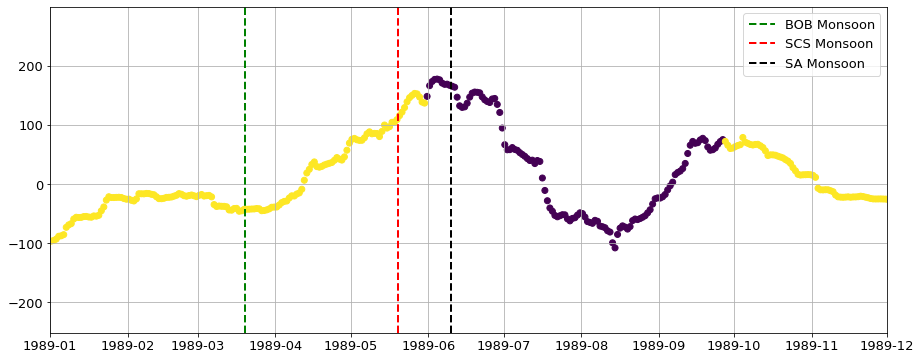

In [78]:
data_daily = pc_proj.pc_proj_ERA5_tp.to_numpy()

prediction_daily = kmean_preditting(model, data_daily)

plt.figure(figsize = (15,6))

plt.scatter(pc_proj.pc_proj_ERA5_tp.time,pc_proj.pc_proj_ERA5_tp.sel(mode=1), c = prediction_daily)
plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1989-12-01'))
plt.axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
plt.grid()
plt.legend()

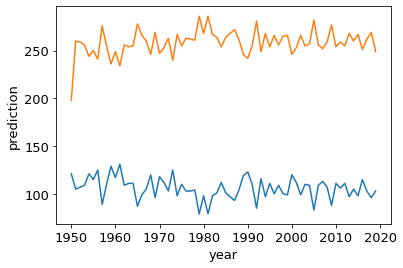

In [79]:
p_d = xr.DataArray(prediction_daily, dims=['time']).rename('prediction')
new = xr.merge([pc_proj,p_d])
evol = new.groupby('prediction')
for i in np.arange(0,2,1):
    evol[i].groupby('time.year').count().prediction.plot()
